# Pandas

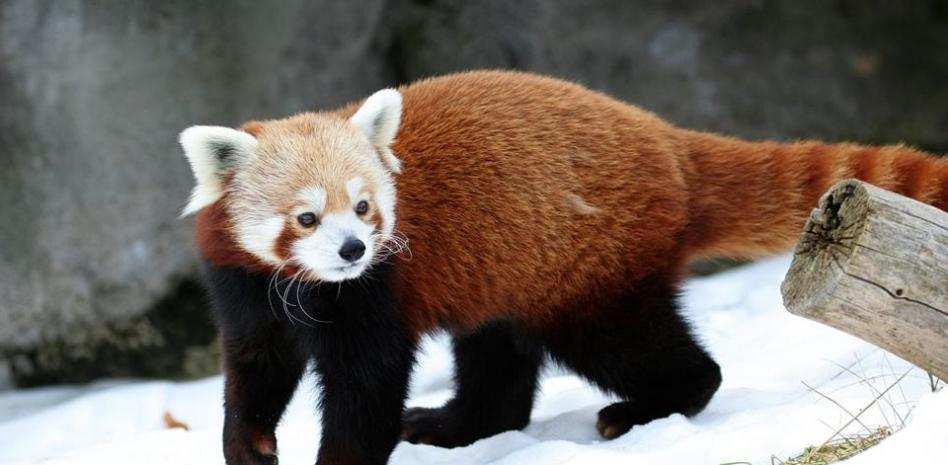

Pandas es una librería con estructuras de datos y herramientas de manipulación de datos diseñadas para hacer la limpieza y el análisis de datos rápido y sencillo. Está construído sobre NumPy, comparte mucha de su funcionalidad y estilo programático.  


Al igual que usamos `np` como alias para numpy, `pd` sera el alias que usaremos para Pandas

In [1]:
import pandas as pd
import numpy as np

## Series

Una Serie de Pandas, es un objeto similar a un vector, que contiene una secuencia de valores y un vector asociado de etiquetas llamado *indice*

De manera similar a los arrays de numpy, podemos crear una serie pasandole una lista a su constructor `pd.Series()`

In [8]:
s1 = pd.Series([1, 2, 3, 4])
s1

0    1
1    2
2    3
3    4
dtype: int64

In [7]:
np.array([1, 2, 3, 4])

array([1, 2, 3, 4])

Tambien podemos crear series a partir a ndarrays (numpy arrays), por lo que tenemos acceso a la toda la funcionalidad de creacion de datos de numpy

In [9]:
s_ceros = pd.Series(np.zeros(4))
print(s_ceros)
s_unos = pd.Series(np.ones(4))
print(s_unos)
s_aleatoria = pd.Series(np.random.randint(10, size=4))
print(s_aleatoria)
s3 = pd.Series(np.arange(4, 8))
print(s3)


0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    1.0
1    1.0
2    1.0
3    1.0
dtype: float64
0    7
1    5
2    1
3    9
dtype: int32
0    4
1    5
2    6
3    7
dtype: int32


Adicional a las funciones de creacion de datos de Numpy, Pandas tambien tiene funcionalidad de creacion de datos, por ejemplo podemos hacer un indice con un rango de datos usando `pd.date_range`

In [11]:
dates = pd.date_range(start='2021', periods=4, freq='M')
dates

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30'], dtype='datetime64[ns]', freq='M')

A diferencia de los numpy arrays, los indices son arbitrarios y nos permite acceder relacionar la informacion con algun dato de interes. Ademas nos permite seleccionar la informacion por medio del uso de estos indices.

In [13]:
a3 = np.arange(4, 8)
a3

array([4, 5, 6, 7])

In [14]:
a3_indexed = pd.Series(a3, index=dates)
a3_indexed

2021-01-31    4
2021-02-28    5
2021-03-31    6
2021-04-30    7
Freq: M, dtype: int32

In [31]:
a3_indexed['2021-02-28']

5

## DataFrames

Un DataFrame representa una tabla rectangular de datos y contiene una colección ordenada de columnas, cada una de las cuales puede ser un tipo de valor diferente (numérico, string, booleano, etc).  
Los DataFrames tieneb un índice de fila y columna; se puede pensar en
como un diccionario de Series, las cuales comparten el mismo índice.

### Crear DataFrames

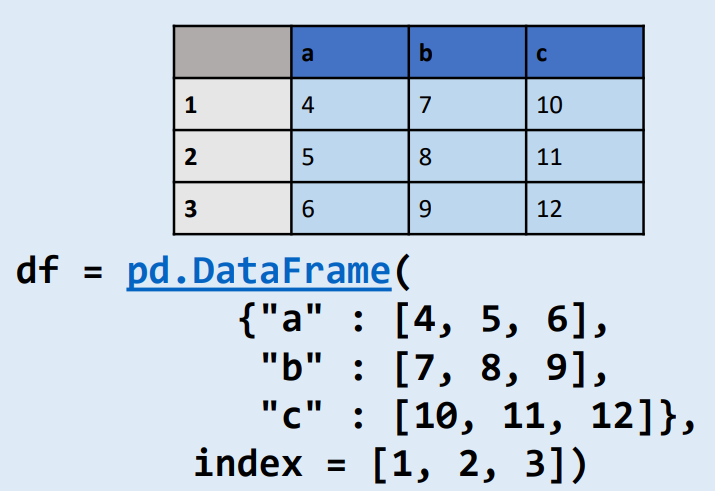

Existen varias maneras de crear un DataFrame, una de las mas comunes es hacerlo a partir de un diccionario de listas/ndarrays/o Pandas series donde la llave es el nombre de las columnas y las listas son del mismo tamano

In [52]:
# print("B:\n", s1)
# print("C:\n", s_ceros)
# print("D:\n", s_unos)
# print("E:\n", s_aleatoria),
# print("F:\n", s3)
# print("index:\n", dates)
df = pd.DataFrame({
    "A": 1,
    "B": s1.to_list(),
    "C": s_ceros.to_list(),
    "D": s_unos.to_list(),
    "E": s_aleatoria.to_list(),
    "F": s3.to_list(),
    "G": "foo"
}, index=dates)
df

,A,B,C,D,E,F,G
2021-01-31,1,1,0.0,1.0,7,4,foo
2021-02-28,1,2,0.0,1.0,5,5,foo
2021-03-31,1,3,0.0,1.0,1,6,foo
2021-04-30,1,4,0.0,1.0,9,7,foo


Otra forma de hacerlo es pasarle una matriz (o una lista de listas), de tal forma que el DataFrame resultante tengra las mismas filas y las mismas columnas. Es posible tambien pasarle el nombre de las columnas y una lista con los indices

In [49]:
pd.DataFrame([[1, 2], [3, 4]], columns=["A", "B"], index=["CDMX", "GDL"])


,A,B
CDMX,1,2
GDL,3,4


In [48]:
random_matrix = np.random.randint(9, size=(4, 3))
print(random_matrix)
pd.DataFrame(random_matrix)

[[2 4 6]
 [8 8 0]
 [3 2 7]
 [0 0 1]]


,0,1,2
0,2,4,6
1,8,8,0
2,3,2,7
3,0,0,1


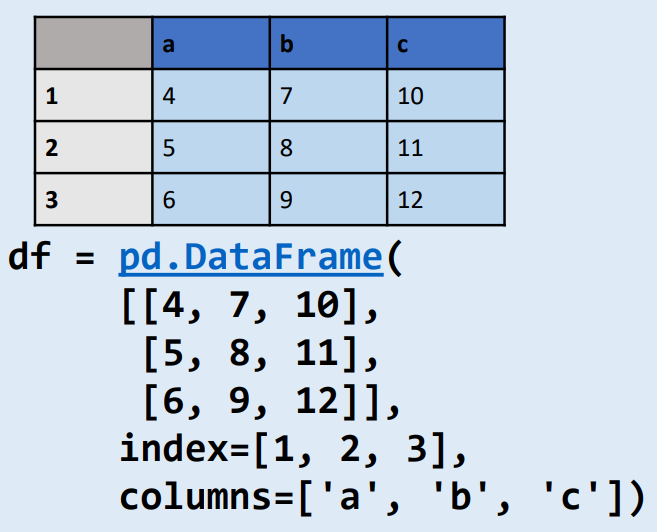

El atributo dtypes nos permite conocer el tipo de datos de cada columna de un DataFrame

In [53]:
df

,A,B,C,D,E,F,G
2021-01-31,1,1,0.0,1.0,7,4,foo
2021-02-28,1,2,0.0,1.0,5,5,foo
2021-03-31,1,3,0.0,1.0,1,6,foo
2021-04-30,1,4,0.0,1.0,9,7,foo


In [55]:
df.dtypes

A      int64
B      int64
C    float64
D    float64
E      int64
F      int64
G     object
dtype: object

### Ver datos

In [105]:
dates = pd.date_range(start='2022-01', periods=10, freq='D')
df = pd.DataFrame(
    np.random.randint(0, 20, size=(10, 8)), 
    index=dates, 
    columns = ["A", "B", "C", "E", "F", "G", "H", "I"])


In [62]:
df

,A,B,C,E,F,G,H,I
2022-01-01,9,11,17,19,13,5,10,13
2022-01-02,1,13,13,14,19,4,12,5
2022-01-03,16,11,2,2,10,9,6,18
2022-01-04,13,4,3,5,15,1,5,14
2022-01-05,17,19,11,11,17,11,18,8
2022-01-06,16,13,14,13,6,8,0,16
2022-01-07,19,13,1,6,8,5,7,1
2022-01-08,5,19,14,6,8,8,13,18
2022-01-09,2,1,9,3,0,16,16,14
2022-01-10,4,6,15,0,8,11,10,16


#### Métodos básicos

Primero veamos unos metodos que nos permiten ver un subcojunto de las filas que tenemos disponibles.

`.head()` selecciona los primeros 5 elementos

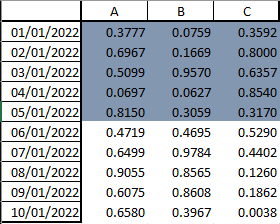

In [58]:
df.head()

,A,B,C,E,F,G,H,I
2022-01-01,3,13,7,7,7,11,4,4
2022-01-02,16,11,9,6,16,16,6,13
2022-01-03,18,18,12,14,10,1,3,2
2022-01-04,11,4,17,6,16,10,5,14
2022-01-05,14,8,13,19,6,4,8,18


`.tail()` selecciona los últimos 5 elementos  
`.tail(n)` selecciona los ultimos n elementos  
por ejemplo, `.tail(2)` selecciona los ultimos 2 elementos  

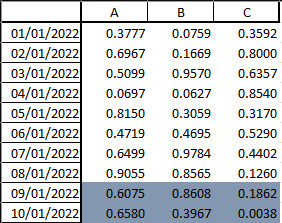




In [70]:
df.tail(2)

,A,B,C,E,F,G,H,I
2022-01-09,2,1,9,3,0,16,16,14
2022-01-10,4,6,15,0,8,11,10,16


`.head(1)` y `.tail(1)` son muy muy utiles para encontrar el primer y ultimo lugar en algun tipo de ordenamiento, si sabemos que nuestro DataFrame esta ordenado.

`.index` extrae el indice de la tabla  

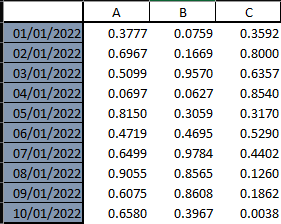

In [72]:
df.index

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10'],
              dtype='datetime64[ns]', freq='D')

`.columns` extrae las columnas de la tabla  
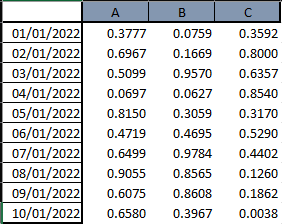

In [73]:
df.columns

Index(['A', 'B', 'C', 'E', 'F', 'G', 'H', 'I'], dtype='object')

Asi como podemos convertir una matriz de Numpy en un DataFrame, tenemos como convertir un Pandas Dataframe en una matriz de Numpy

In [74]:
df.to_numpy()
# Notese como se pierden las columnas y los indices

array([[ 9, 11, 17, 19, 13,  5, 10, 13],
       [ 1, 13, 13, 14, 19,  4, 12,  5],
       [16, 11,  2,  2, 10,  9,  6, 18],
       [13,  4,  3,  5, 15,  1,  5, 14],
       [17, 19, 11, 11, 17, 11, 18,  8],
       [16, 13, 14, 13,  6,  8,  0, 16],
       [19, 13,  1,  6,  8,  5,  7,  1],
       [ 5, 19, 14,  6,  8,  8, 13, 18],
       [ 2,  1,  9,  3,  0, 16, 16, 14],
       [ 4,  6, 15,  0,  8, 11, 10, 16]])

Al igual que como lo hacemos en las matrices de Numpy `T` nos permite transponer un DataFrame.  
Las columnas se convierten en indices, los indices en columnas  

In [77]:
df.T

,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10
A,9,1,16,13,17,16,19,5,2,4
B,11,13,11,4,19,13,13,19,1,6
C,17,13,2,3,11,14,1,14,9,15
E,19,14,2,5,11,13,6,6,3,0
F,13,19,10,15,17,6,8,8,0,8
G,5,4,9,1,11,8,5,8,16,11
H,10,12,6,5,18,0,7,13,16,10
I,13,5,18,14,8,16,1,18,14,16


Los metodos de seleccion de datos son similares a los usados en las listas y los numpy arrays en cuanto a como pueden ser indexados (`obj[...]`), pero tambien tienen la posiblidad de seleccionar datos usando los indices de las Series correspondientes, similar a como seleccionamos datos en un diccionario (`obj[key]`)

Usando `["<nombre_columna>"]` podemos acceder a la informacion contenida en alguna columna.  
`.<nombre_columna>` tambien funciona   

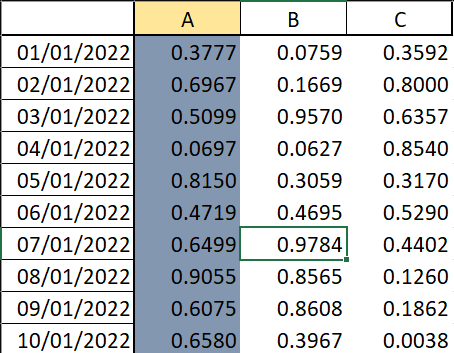

In [78]:
df['A']

2022-01-01     9
2022-01-02     1
2022-01-03    16
2022-01-04    13
2022-01-05    17
2022-01-06    16
2022-01-07    19
2022-01-08     5
2022-01-09     2
2022-01-10     4
Freq: D, Name: A, dtype: int32

In [79]:
df.A

2022-01-01     9
2022-01-02     1
2022-01-03    16
2022-01-04    13
2022-01-05    17
2022-01-06    16
2022-01-07    19
2022-01-08     5
2022-01-09     2
2022-01-10     4
Freq: D, Name: A, dtype: int32

`[["<col_1>", "<col_2>", ...]]`  Nos permite seleccionar mas de una columna a la vez.  
Notar que pasamos una lista con el nombre de las columnas.  
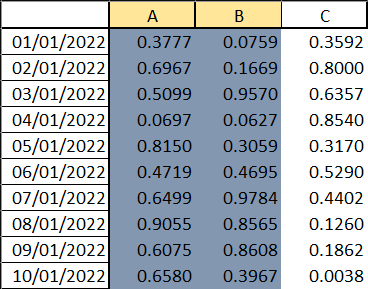

In [85]:
df[['A', 'B']]

,A,B
2022-01-01,9,11
2022-01-02,1,13
2022-01-03,16,11
2022-01-04,13,4
2022-01-05,17,19
2022-01-06,16,13
2022-01-07,19,13
2022-01-08,5,19
2022-01-09,2,1
2022-01-10,4,6


Si en vez de pasar nombres de columnas al corchete `df[]`, le pasamos numeros, vamos a obtener las filas con la posicion indicada.  
Funciona rango de posiciones `df[ini:fin]`  
Funciona rango de indices `df[i_ini:i_fin]`  

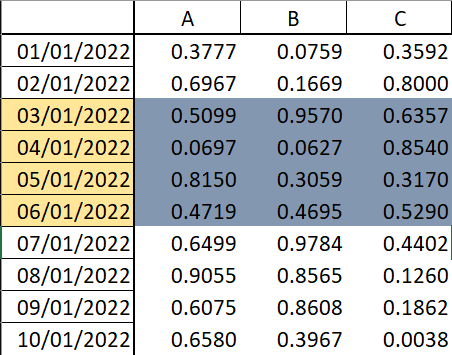

In [88]:
df[3:7]

,A,B,C,E,F,G,H,I
2022-01-04,13,4,3,5,15,1,5,14
2022-01-05,17,19,11,11,17,11,18,8
2022-01-06,16,13,14,13,6,8,0,16
2022-01-07,19,13,1,6,8,5,7,1


In [89]:
df['2022-01-04':'2022-01-07']

,A,B,C,E,F,G,H,I
2022-01-04,13,4,3,5,15,1,5,14
2022-01-05,17,19,11,11,17,11,18,8
2022-01-06,16,13,14,13,6,8,0,16
2022-01-07,19,13,1,6,8,5,7,1


#### `.loc` Seleccionar por etiqueta

El hecho de que los Pandas DataFrames nos permitan indexar con posiciones y con etiquetas genera la necesidad de ser explicitos con que metodo estamos usando a la hora de seleccionar datos. Para esto, tendremos un metodo para seleccionar por etiqueta `.loc[]` y otro para seleccionar por posicion `.iloc[]`

Es importante notar que no es un metodo en el que estamos usando parentisis `()` para ejecutar, sino un indexable que llamamos usando corchetes `[]`

Si solo pasamos una etiqueta, `.iloc[]` interpretara que estamos consultando una fila, haciendo uso de el nombre del indice.

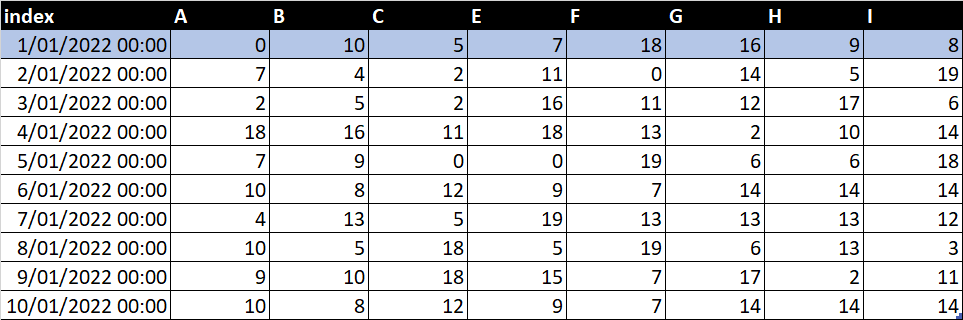

In [110]:
df.loc[['2022-01-01', '2022-01-02', '2022-01-03']]
# Notar que cuando pedimos una sola fila, se nos regresa una Serie de Pandas,
# con las columnas tomando la posicion de los indices. 

,A,B,C,E,F,G,H,I
2022-01-01,5,3,19,3,7,9,11,0
2022-01-02,18,1,8,15,11,13,17,7
2022-01-03,1,14,5,8,12,0,1,1


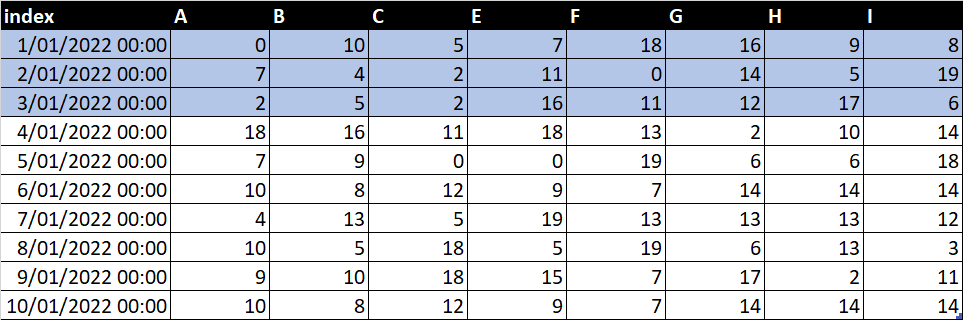

In [111]:
# Funciona pedir una lista de indices
df.loc[['2022-01-01', '2022-01-02', '2022-01-03']]

,A,B,C,E,F,G,H,I
2022-01-01,5,3,19,3,7,9,11,0
2022-01-02,18,1,8,15,11,13,17,7
2022-01-03,1,14,5,8,12,0,1,1


In [113]:
# Funciona pedir un rango de indices
df.loc['2022-01-01':'2022-01-06']

,A,B,C,E,F,G,H,I
2022-01-01,5,3,19,3,7,9,11,0
2022-01-02,18,1,8,15,11,13,17,7
2022-01-03,1,14,5,8,12,0,1,1
2022-01-04,1,9,0,6,14,15,8,5
2022-01-05,5,1,5,4,16,16,15,8
2022-01-06,3,10,14,0,14,7,17,17


Si queremos seleccionar columnas por nombre, tenemos que primero indicar que filas queremos llamar.  
Una manera de hacer esto, es seleccionando el rango completo `:` primero, y despues pasar el nombre de la columna, o una lista con los nombres de las columnas que queremos  
`[:, ["<col_1>", "col_2"]]`

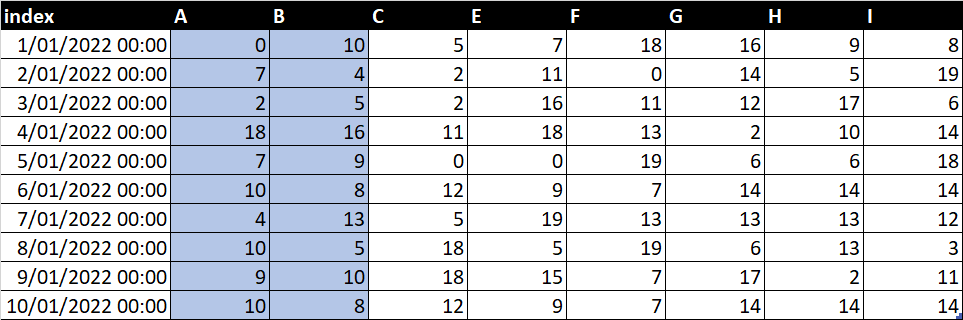

In [120]:
df.loc[:,["B", "A"]]

,B,A
2022-01-01,3,5
2022-01-02,1,18
2022-01-03,14,1
2022-01-04,9,1
2022-01-05,1,5
2022-01-06,10,3
2022-01-07,2,7
2022-01-08,9,19
2022-01-09,13,1
2022-01-10,15,12


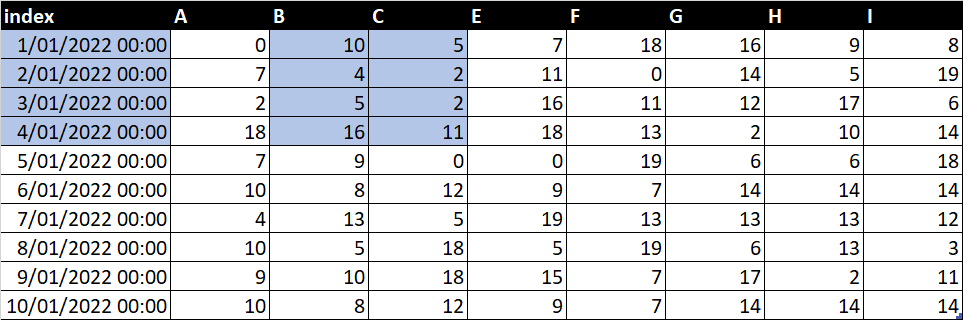

In [122]:
df.loc[:,["B", "E"]]

,B,E
2022-01-01,3,3
2022-01-02,1,15
2022-01-03,14,8
2022-01-04,9,6
2022-01-05,1,4
2022-01-06,10,0
2022-01-07,2,0
2022-01-08,9,9
2022-01-09,13,12
2022-01-10,15,7


In [123]:
print("nombres de indices: \n", dates[0:4])
df.loc[['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04'],["B", "E"]]

nombres de indices: 
 DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04'], dtype='datetime64[ns]', freq='D')


,B,E
2022-01-01,3,3
2022-01-02,1,15
2022-01-03,14,8
2022-01-04,9,6


Si solicitamos un elemento, nos regresara ese elemento y no un DataFrame

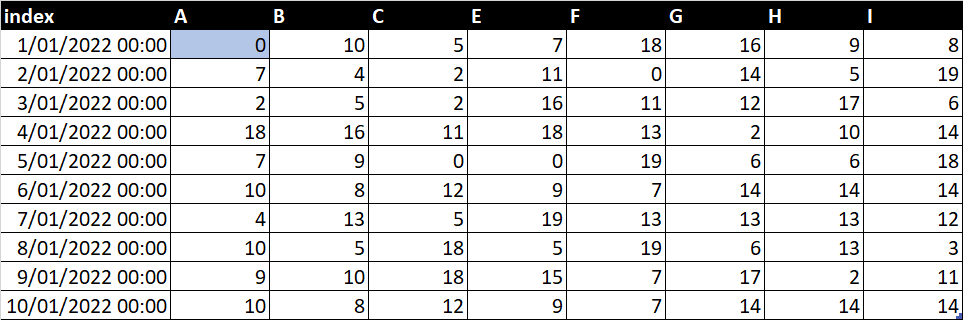

In [125]:
df.loc["2022-01-01", "A"]

5

Pero podemos pasar los nombres del indice y columna a solicitar, cada uno dentro de una lista si queremos obtener un data frama de `1 x 1`

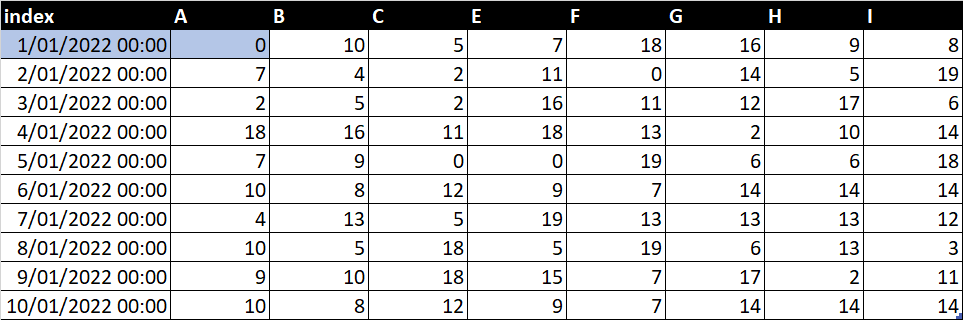

In [126]:
df.loc[["2022-01-01"], ["A"]]

,A
2022-01-01,5


#### `.iloc` Seleccionar por posición 

En el caso de `.iloc[]` los argumentos a pasar son numeros enteros, listas de numeros enteros o rangos de numeros enteros con las posiciones de las filas y columnas a seleccionar.

Al igual que con `.loc[]`, si solo se pasa un argumento a `.iloc[]` se entendera que se esta consultando una fila.

Una vez dicho eso, como podemos ver en los siguientes ejemplos, el comportamiento es analogo a la indexacion de una matriz de Numpy

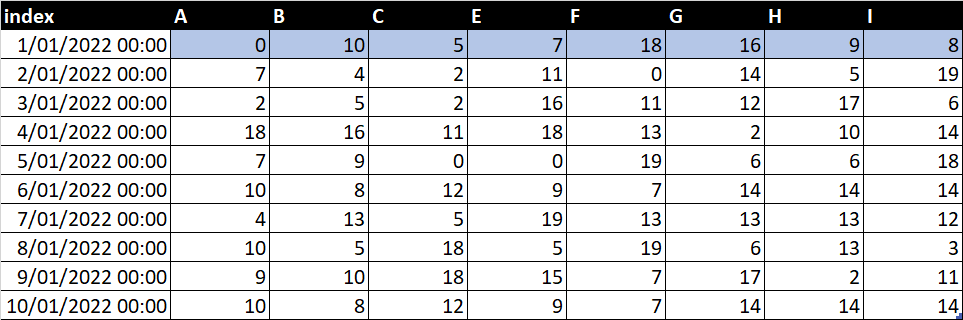

In [129]:
matrix = df.to_numpy()
df.iloc[0]

A     5
B     3
C    19
E     3
F     7
G     9
H    11
I     0
Name: 2022-01-01, dtype: int32

In [130]:
matrix[0]

array([ 5,  3, 19,  3,  7,  9, 11,  0])

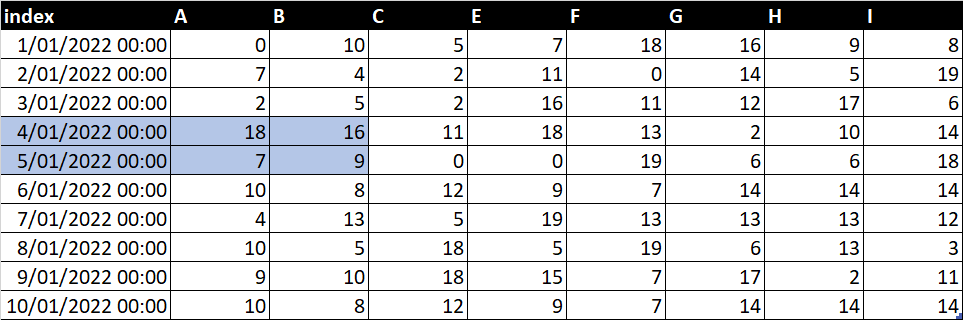

In [132]:
df.iloc[[3, 4], [0, 1]]

,A,B
2022-01-04,1,9
2022-01-05,5,1


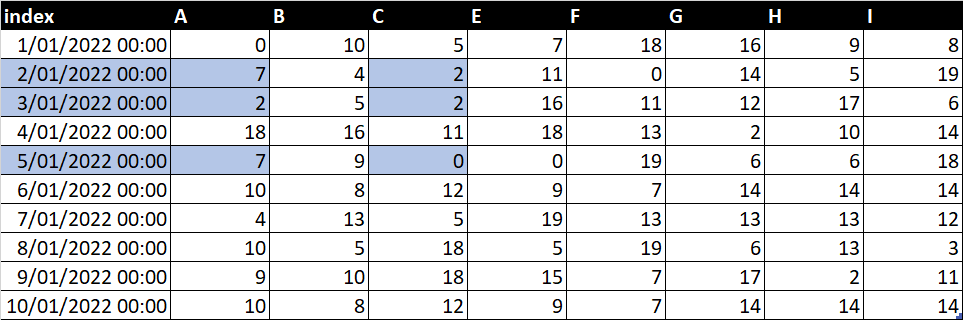

In [134]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2022-01-02,18,8
2022-01-03,1,5
2022-01-05,5,5


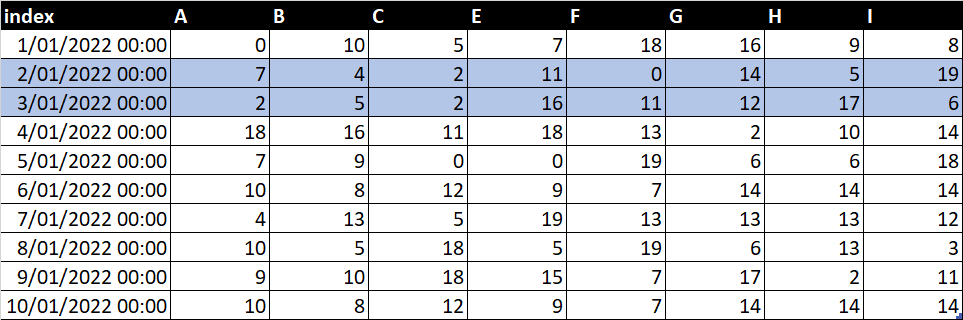

In [140]:
df.iloc[1:-1, :]

,A,B,C,E,F,G,H,I
2022-01-02,18,1,8,15,11,13,17,7
2022-01-03,1,14,5,8,12,0,1,1
2022-01-04,1,9,0,6,14,15,8,5
2022-01-05,5,1,5,4,16,16,15,8
2022-01-06,3,10,14,0,14,7,17,17
2022-01-07,7,2,18,0,13,18,2,9
2022-01-08,19,9,6,9,17,18,7,0
2022-01-09,1,13,5,12,2,1,5,17


In [141]:
df.iloc[:, 4:-1]

,F,G,H
2022-01-01,7,9,11
2022-01-02,11,13,17
2022-01-03,12,0,1
2022-01-04,14,15,8
2022-01-05,16,16,15
2022-01-06,14,7,17
2022-01-07,13,18,2
2022-01-08,17,18,7
2022-01-09,2,1,5
2022-01-10,4,18,16


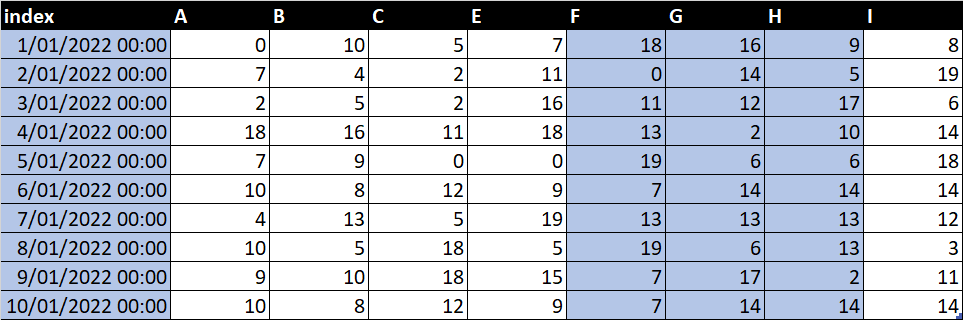

In [142]:
df.iloc[1, 1]

1

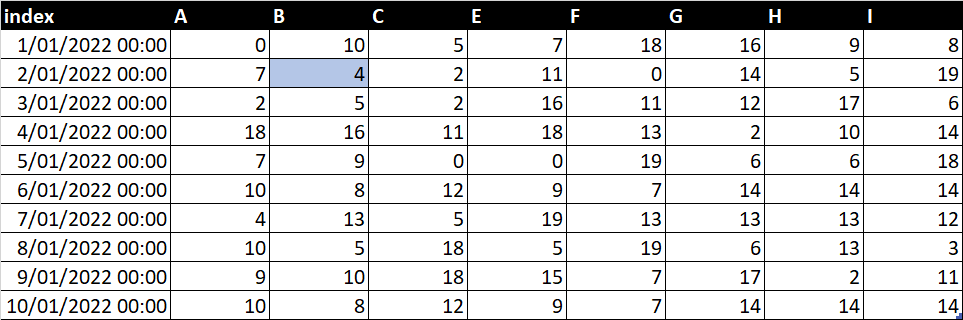

In [143]:
df.iloc[[1], [1]]

,B
2022-01-02,1


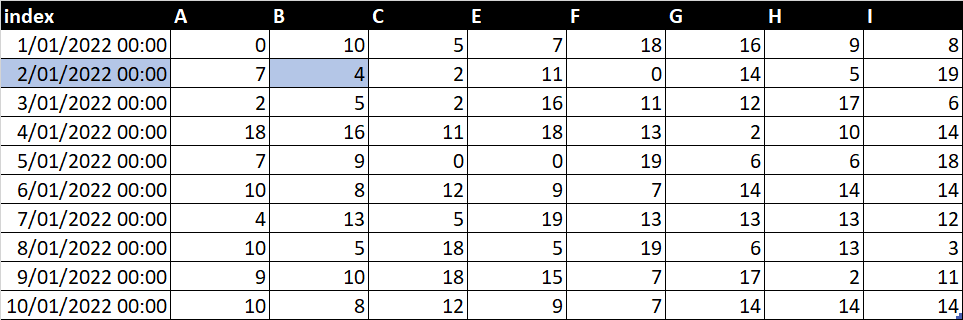

#### Indices booleanos (i.e. como filtrar un df)

De manera analoga a como filtrabamos valores en un Numpy array, es posible usar una expresion booleana sobre una Serie de Pandas (recuerda que las columnas de un DataFrame son Series) y obtener una Serie con valores booleanos y el mismo indice.

In [145]:
df["A"] > 4

2022-01-01     True
2022-01-02     True
2022-01-03    False
2022-01-04    False
2022-01-05     True
2022-01-06    False
2022-01-07     True
2022-01-08     True
2022-01-09    False
2022-01-10     True
Name: A, dtype: bool

Si hacemos uso de la indexacion de los DataFrames de la siguiente manera `df[<boolean_series>]` es posible filtrar las filas que cumplan cierta condicion.

In [148]:
df[df["A"] > 4]

,A,B,C,E,F,G,H,I
2022-01-01,5,3,19,3,7,9,11,0
2022-01-02,18,1,8,15,11,13,17,7
2022-01-05,5,1,5,4,16,16,15,8
2022-01-07,7,2,18,0,13,18,2,9
2022-01-08,19,9,6,9,17,18,7,0
2022-01-10,12,15,15,7,4,18,16,8


De igual forma, es posible evaluar una expresion booleana sobre un DataFrame. Pandas evaluara cada elemento del DataFrame con esa expresion y regresara un DataFrame de las mismas dimensiones y con los valores booleanos reslultantes de la expresion

In [150]:
df > 10

,A,B,C,E,F,G,H,I
2022-01-01,False,False,True,False,False,False,True,False
2022-01-02,True,False,False,True,True,True,True,False
2022-01-03,False,True,False,False,True,False,False,False
2022-01-04,False,False,False,False,True,True,False,False
2022-01-05,False,False,False,False,True,True,True,False
2022-01-06,False,False,True,False,True,False,True,True
2022-01-07,False,False,True,False,True,True,False,False
2022-01-08,True,False,False,False,True,True,False,False
2022-01-09,False,True,False,True,False,False,False,True
2022-01-10,True,True,True,False,False,True,True,False


Es posible usar esto como indice de un DataFrame. Todo resultado nulo sera modificado por un valor `NaN` (not a number)

In [152]:
df[df > 10]

,A,B,C,E,F,G,H,I
2022-01-01,NaN,NaN,19.0,NaN,NaN,NaN,11.0,NaN
2022-01-02,18.0,NaN,NaN,15.0,11.0,13.0,17.0,NaN
2022-01-03,NaN,14.0,NaN,NaN,12.0,NaN,NaN,NaN
2022-01-04,NaN,NaN,NaN,NaN,14.0,15.0,NaN,NaN
2022-01-05,NaN,NaN,NaN,NaN,16.0,16.0,15.0,NaN
2022-01-06,NaN,NaN,14.0,NaN,14.0,NaN,17.0,17.0
2022-01-07,NaN,NaN,18.0,NaN,13.0,18.0,NaN,NaN
2022-01-08,19.0,NaN,NaN,NaN,17.0,18.0,NaN,NaN
2022-01-09,NaN,13.0,NaN,12.0,NaN,NaN,NaN,17.0
2022-01-10,12.0,15.0,15.0,NaN,NaN,18.0,16.0,NaN


#### Resumen de metodos de seleccion de datos

La siguiente es una tabla con los distintos metodos de seleccion de datos, notar que no vimos todos. Los vistos son los mas usados, pero se agregan los demas por completitud.

| Sintaxis | Descripción |
| ----------- | ----------- |
|`df[val]` |Seleccione una sola columna o secuencia de columnas de las conveniencias de casos especiales de DataFrame: matriz booleana (filtro) o rangos|
|`df.loc[val]` |Selecciona una sola fila o un subconjunto de filas del DataFrame por etiqueta
|`df.loc[:, val]` |Selecciona una sola columna o un subconjunto de columnas por etiqueta
|`df.loc[val1, val2]` |Seleccionar filas y columnas por etiqueta
|`df.iloc[where]` |Selecciona una sola fila o un subconjunto de filas del DataFrame por posición entera|
|`df.iloc[:, where]` |Selecciona una sola columna o subconjunto de columnas por posición de entero|
|`df.iloc[where_i, where_j]` |Seleccionar filas y columnas por posición de número entero
|`df.at[label_i, label_j]` |Seleccione un solo valor escalar por etiqueta de fila y columna
|`df.iat[i, j]` |Seleccione un solo valor escalar por posición de fila y columna (enteros)|
|método `.reindex()` |Seleccione filas o columnas por etiquetas|
|métodos `.get_value()`, `.set_value()` |Seleccionar valor único por etiqueta de fila y columna|

### Modificar DataFrames

In [153]:
dates = pd.date_range(start='2022-01', periods=10, freq='D')
df = pd.DataFrame(
    np.random.randint(0, 20, size=(10, 9)), 
    index=dates, 
    columns = ["A", "B", "C", "D", "E", "F", "G", "H", "I"])


#### Modificar nombres de columnas e indices

Los mismos atributos que usamos para ver los indices y las columnas se pueden usar para sobreescribirlos

In [163]:
print(df.columns)
df.columns = [c.lower() for c in df.columns]
print(df.columns)
df.head(3)

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'], dtype='object')
Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i'], dtype='object')


,a,b,c,d,e,f,g,h,i
2022-01-01,14,7,13,8,18,15,10,8,18
2022-01-02,11,13,16,1,13,7,6,2,5
2022-01-03,9,13,15,9,1,16,17,17,4


In [165]:
print(df.index[:4])
df.index = [i.day_name() + " " + str(i.day) for i in df.index]
print(df.index[:4])
df.head(3)

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04'], dtype='datetime64[ns]', freq='D')
Index(['Saturday 1', 'Sunday 2', 'Monday 3', 'Tuesday 4'], dtype='object')


,a,b,c,d,e,f,g,h,i
Saturday 1,14,7,13,8,18,15,10,8,18
Sunday 2,11,13,16,1,13,7,6,2,5
Monday 3,9,13,15,9,1,16,17,17,4


#### Modificar datos de columnas

Las columnas pueden ser modificadas por medio de asignacion

In [166]:
df.head()

,a,b,c,d,e,f,g,h,i
Saturday 1,14,7,13,8,18,15,10,8,18
Sunday 2,11,13,16,1,13,7,6,2,5
Monday 3,9,13,15,9,1,16,17,17,4
Tuesday 4,7,2,15,18,14,8,16,3,14
Wednesday 5,17,9,6,12,9,15,9,19,3


In [171]:
df['i']

Saturday 1     1.0
Sunday 2       1.0
Monday 3       1.0
Tuesday 4      1.0
Wednesday 5    1.0
Thursday 6     1.0
Friday 7       1.0
Saturday 8     1.0
Sunday 9       1.0
Monday 10      1.0
Name: i, dtype: float64

In [168]:
df['i'] = np.ones(10)

In [169]:

df.head()

,a,b,c,d,e,f,g,h,i
Saturday 1,14,7,13,8,18,15,10,8,1.0
Sunday 2,11,13,16,1,13,7,6,2,1.0
Monday 3,9,13,15,9,1,16,17,17,1.0
Tuesday 4,7,2,15,18,14,8,16,3,1.0
Wednesday 5,17,9,6,12,9,15,9,19,1.0


#### Agregar filas y columnas

Si hacemos la asignacion a una columna no existe, crearemos una columna nueva

In [172]:
df['j'] = np.zeros(10)
df.head()

,a,b,c,d,e,f,g,h,i,j
Saturday 1,14,7,13,8,18,15,10,8,1.0,0.0
Sunday 2,11,13,16,1,13,7,6,2,1.0,0.0
Monday 3,9,13,15,9,1,16,17,17,1.0,0.0
Tuesday 4,7,2,15,18,14,8,16,3,1.0,0.0
Wednesday 5,17,9,6,12,9,15,9,19,1.0,0.0


In [173]:
df.loc[:, 'k'] = np.arange(10) 

In [174]:
df

,a,b,c,d,e,f,g,h,i,j,k
Saturday 1,14,7,13,8,18,15,10,8,1.0,0.0,0
Sunday 2,11,13,16,1,13,7,6,2,1.0,0.0,1
Monday 3,9,13,15,9,1,16,17,17,1.0,0.0,2
Tuesday 4,7,2,15,18,14,8,16,3,1.0,0.0,3
Wednesday 5,17,9,6,12,9,15,9,19,1.0,0.0,4
Thursday 6,5,3,5,9,2,7,18,1,1.0,0.0,5
Friday 7,12,0,12,13,10,18,14,16,1.0,0.0,6
Saturday 8,8,10,18,1,1,4,0,17,1.0,0.0,7
Sunday 9,19,11,19,19,4,2,8,8,1.0,0.0,8
Monday 10,12,5,13,11,19,4,17,16,1.0,0.0,9


In [175]:
df.loc[:, 'l'] = df.loc[:, 'g'] + df.loc[:, 'a']
df.head()

,a,b,c,d,e,f,g,h,i,j,k,l
Saturday 1,14,7,13,8,18,15,10,8,1.0,0.0,0,24
Sunday 2,11,13,16,1,13,7,6,2,1.0,0.0,1,17
Monday 3,9,13,15,9,1,16,17,17,1.0,0.0,2,26
Tuesday 4,7,2,15,18,14,8,16,3,1.0,0.0,3,23
Wednesday 5,17,9,6,12,9,15,9,19,1.0,0.0,4,26


Para agragar filas vamos a usar el metodo `.append()`

In [179]:
new_row = {
    "a": 1, "b": 2, "c": 3, "d": 4, "e": 5, 
    "f": 6, "g": 7, "h": 8, "i": 9, "j": 0}

# Solo podemos `appendear` un diccionario si especificamos `ignore_index=True`
df.append(new_row, ignore_index=True).tail(3)

,a,b,c,d,e,f,g,h,i,j,k,l
8,19.0,11.0,19.0,19.0,4.0,2.0,8.0,8.0,1.0,0.0,8.0,27.0
9,12.0,5.0,13.0,11.0,19.0,4.0,17.0,16.0,1.0,0.0,9.0,29.0
10,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,0.0,NaN,NaN


In [177]:
df.tail(3)

,a,b,c,d,e,f,g,h,i,j,k,l
Saturday 8,8,10,18,1,1,4,0,17,1.0,0.0,7,8
Sunday 9,19,11,19,19,4,2,8,8,1.0,0.0,8,27
Monday 10,12,5,13,11,19,4,17,16,1.0,0.0,9,29


Que paso? No se agrego nuestra fila.  

La forma en la que funcionan los metodos de los DataFrames es que no modifican el DF original, sino que regresan uno nuevo. Existen dos formas de solucionar esto.


1.   A estos metodos se les modificar el argumento `inplace` a `True` y en ese caso se modificara el original en vez de regresar uno nuevo.  
  `df.append(new_row, ignore_index=True, inplace=True)`
2. Se puede reescribir la variable por medio de una asignacion  
  `df = df.append(new_row, ignore_index=True)`



Lamentablemente este metodo tiene la desventaja de eliminar el indice original, pero podemos solucionar eso asignando una fila nueva usando `.loc[]`

In [180]:
df.loc["Tuesday 11", :] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [181]:
df.tail(3)

,a,b,c,d,e,f,g,h,i,j,k,l
Sunday 9,19.0,11.0,19.0,19.0,4.0,2.0,8.0,8.0,1.0,0.0,8.0,27.0
Monday 10,12.0,5.0,13.0,11.0,19.0,4.0,17.0,16.0,1.0,0.0,9.0,29.0
Tuesday 11,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0


#### Eliminar filas y columnas

Para eliminar una columna o una fila usamos el metodo `.drop()`. Al igual que con el `.append()`, necesitamos sobreescribir la variable por medio de una asignacion, o pasar el argumento `inplace = True`

In [191]:
df.drop('a', axis='columns', inplace=True)
df.head(3)

KeyError: "['a'] not found in axis"

In [189]:
df = df.drop('Saturday 1', axis='index')
df.head(3)

,b,c,d,e,f,g,h,i,j,k,l
Sunday 2,13.0,16.0,1.0,13.0,7.0,6.0,2.0,1.0,0.0,1.0,17.0
Monday 3,13.0,15.0,9.0,1.0,16.0,17.0,17.0,1.0,0.0,2.0,26.0
Tuesday 4,2.0,15.0,18.0,14.0,8.0,16.0,3.0,1.0,0.0,3.0,23.0


#### Modificar valores

Todos los metodos que aprendimos para 'ver' datos (slicing, indexing, iloc, loc, etc) sirven para modificar los datos en caso de hacer una asignacion

In [192]:
df

,b,c,d,e,f,g,h,i,j,k,l
Sunday 2,13.0,16.0,1.0,13.0,7.0,6.0,2.0,1.0,0.0,1.0,17.0
Monday 3,13.0,15.0,9.0,1.0,16.0,17.0,17.0,1.0,0.0,2.0,26.0
Tuesday 4,2.0,15.0,18.0,14.0,8.0,16.0,3.0,1.0,0.0,3.0,23.0
Wednesday 5,9.0,6.0,12.0,9.0,15.0,9.0,19.0,1.0,0.0,4.0,26.0
Thursday 6,3.0,5.0,9.0,2.0,7.0,18.0,1.0,1.0,0.0,5.0,23.0
Friday 7,0.0,12.0,13.0,10.0,18.0,14.0,16.0,1.0,0.0,6.0,26.0
Saturday 8,10.0,18.0,1.0,1.0,4.0,0.0,17.0,1.0,0.0,7.0,8.0
Sunday 9,11.0,19.0,19.0,4.0,2.0,8.0,8.0,1.0,0.0,8.0,27.0
Monday 10,5.0,13.0,11.0,19.0,4.0,17.0,16.0,1.0,0.0,9.0,29.0
Tuesday 11,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0


In [194]:
df[['d','b']].head(3)

,d,b
Sunday 2,1.0,13.0
Monday 3,9.0,13.0
Tuesday 4,18.0,2.0


In [199]:
df[['d', 'b']] = np.arange(20).reshape(-1, 2)
df[['d', 'b']].head(5)

,d,b
Sunday 2,0.0,1.0
Monday 3,2.0,3.0
Tuesday 4,4.0,5.0
Wednesday 5,6.0,7.0
Thursday 6,8.0,9.0


In [200]:
df['Sunday 2':'Tuesday 4']

,b,c,d,e,f,g,h,i,j,k,l
Sunday 2,1.0,16.0,0.0,13.0,7.0,6.0,2.0,1.0,0.0,1.0,17.0
Monday 3,3.0,15.0,2.0,1.0,16.0,17.0,17.0,1.0,0.0,2.0,26.0
Tuesday 4,5.0,15.0,4.0,14.0,8.0,16.0,3.0,1.0,0.0,3.0,23.0


In [202]:
df['Sunday 2':'Tuesday 4'] = np.linspace(start=12, stop=24, num=33).reshape(3, -1)
df.head()

,b,c,d,e,f,g,h,i,j,k,l
Sunday 2,12.000,12.375,12.750,13.125,13.500,13.875,14.250,14.625,15.000,15.375,15.750
Monday 3,16.125,16.500,16.875,17.250,17.625,18.000,18.375,18.750,19.125,19.500,19.875
Tuesday 4,20.250,20.625,21.000,21.375,21.750,22.125,22.500,22.875,23.250,23.625,24.000
Wednesday 5,7.000,6.000,6.000,9.000,15.000,9.000,19.000,1.000,0.000,4.000,26.000
Thursday 6,9.000,5.000,8.000,2.000,7.000,18.000,1.000,1.000,0.000,5.000,23.000


#### Modificar valores condicionalmente

Podemos usar `np.where()` para modificar condicionalmente valores

In [203]:
df[['g', 'b']].head()

,g,b
Sunday 2,13.875,12.000
Monday 3,18.000,16.125
Tuesday 4,22.125,20.250
Wednesday 5,9.000,7.000
Thursday 6,18.000,9.000


In [204]:
df['g'] = np.where(df['b'] < 10, 5, df['g'])
df[['g', 'b']].head()

,g,b
Sunday 2,13.875,12.000
Monday 3,18.000,16.125
Tuesday 4,22.125,20.250
Wednesday 5,5.000,7.000
Thursday 6,5.000,9.000


#### Ordenar y rankear

Ordenar bajo algun criterio es una de las tareas mas importantes en el analisis de datos es el encontrar orden en la informacion y el hacer comparaciones directas entre observaciones.  

Para esto, Pandas nos ofrece diversas maneras de ordenar la informacon.  

Si queremos ordenar lexicograficamente nuestros indices de fila o columna, podemos usar el metodo `.sort_index()`

In [205]:
df.head()

,b,c,d,e,f,g,h,i,j,k,l
Sunday 2,12.000,12.375,12.750,13.125,13.500,13.875,14.250,14.625,15.000,15.375,15.750
Monday 3,16.125,16.500,16.875,17.250,17.625,18.000,18.375,18.750,19.125,19.500,19.875
Tuesday 4,20.250,20.625,21.000,21.375,21.750,22.125,22.500,22.875,23.250,23.625,24.000
Wednesday 5,7.000,6.000,6.000,9.000,15.000,5.000,19.000,1.000,0.000,4.000,26.000
Thursday 6,9.000,5.000,8.000,2.000,7.000,5.000,1.000,1.000,0.000,5.000,23.000


In [206]:
df.sort_index().head()

,b,c,d,e,f,g,h,i,j,k,l
Friday 7,11.000,12.000,10.000,10.000,18.000,14.000,16.000,1.000,0.000,6.000,26.000
Monday 10,17.000,13.000,16.000,19.000,4.000,17.000,16.000,1.000,0.000,9.000,29.000
Monday 3,16.125,16.500,16.875,17.250,17.625,18.000,18.375,18.750,19.125,19.500,19.875
Saturday 8,13.000,18.000,12.000,1.000,4.000,0.000,17.000,1.000,0.000,7.000,8.000
Sunday 2,12.000,12.375,12.750,13.125,13.500,13.875,14.250,14.625,15.000,15.375,15.750


Notarque el orden es lexicografico y no respeto el orden por fechas (Tambien es cierto que por las transformaciones hechas, este indice es un string, no un objeto fecha)

El argumento `axis` nos permite elegir ordenar los indices de las filas o de las columnas  
El argumento `ascending` nos permite elegir orden ascendente o descendente

In [209]:
df.sort_index(axis="columns", ascending=False).head()

,l,k,j,i,h,g,f,e,d,c,b
Sunday 2,15.750,15.375,15.000,14.625,14.250,13.875,13.500,13.125,12.750,12.375,12.000
Monday 3,19.875,19.500,19.125,18.750,18.375,18.000,17.625,17.250,16.875,16.500,16.125
Tuesday 4,24.000,23.625,23.250,22.875,22.500,22.125,21.750,21.375,21.000,20.625,20.250
Wednesday 5,26.000,4.000,0.000,1.000,19.000,5.000,15.000,9.000,6.000,6.000,7.000
Thursday 6,23.000,5.000,0.000,1.000,1.000,5.000,7.000,2.000,8.000,5.000,9.000


Como se ha visto antes, para hacer el cambio persistente, es necesario elegir `inplace=True` o sobreescribir la variable

Si queremos ordenar por una variable en particular, hacemos uso de `.sort_values()`

In [215]:
df.sort_values('c')

,b,c,d,e,f,g,h,i,j,k,l
Tuesday 11,19.000,3.000,18.000,5.000,6.000,7.000,8.000,9.000,10.000,11.000,12.000
Thursday 6,9.000,5.000,8.000,2.000,7.000,5.000,1.000,1.000,0.000,5.000,23.000
Wednesday 5,7.000,6.000,6.000,9.000,15.000,5.000,19.000,1.000,0.000,4.000,26.000
Friday 7,11.000,12.000,10.000,10.000,18.000,14.000,16.000,1.000,0.000,6.000,26.000
Sunday 2,12.000,12.375,12.750,13.125,13.500,13.875,14.250,14.625,15.000,15.375,15.750
Monday 10,17.000,13.000,16.000,19.000,4.000,17.000,16.000,1.000,0.000,9.000,29.000
Monday 3,16.125,16.500,16.875,17.250,17.625,18.000,18.375,18.750,19.125,19.500,19.875
Saturday 8,13.000,18.000,12.000,1.000,4.000,0.000,17.000,1.000,0.000,7.000,8.000
Sunday 9,15.000,19.000,14.000,4.000,2.000,8.000,8.000,1.000,0.000,8.000,27.000
Tuesday 4,20.250,20.625,21.000,21.375,21.750,22.125,22.500,22.875,23.250,23.625,24.000


In [216]:
df.sort_values('h', ascending=False)

,b,c,d,e,f,g,h,i,j,k,l
Tuesday 4,20.250,20.625,21.000,21.375,21.750,22.125,22.500,22.875,23.250,23.625,24.000
Wednesday 5,7.000,6.000,6.000,9.000,15.000,5.000,19.000,1.000,0.000,4.000,26.000
Monday 3,16.125,16.500,16.875,17.250,17.625,18.000,18.375,18.750,19.125,19.500,19.875
Saturday 8,13.000,18.000,12.000,1.000,4.000,0.000,17.000,1.000,0.000,7.000,8.000
Friday 7,11.000,12.000,10.000,10.000,18.000,14.000,16.000,1.000,0.000,6.000,26.000
Monday 10,17.000,13.000,16.000,19.000,4.000,17.000,16.000,1.000,0.000,9.000,29.000
Sunday 2,12.000,12.375,12.750,13.125,13.500,13.875,14.250,14.625,15.000,15.375,15.750
Sunday 9,15.000,19.000,14.000,4.000,2.000,8.000,8.000,1.000,0.000,8.000,27.000
Tuesday 11,19.000,3.000,18.000,5.000,6.000,7.000,8.000,9.000,10.000,11.000,12.000
Thursday 6,9.000,5.000,8.000,2.000,7.000,5.000,1.000,1.000,0.000,5.000,23.000


### Aritmetica y análisis descriptivo básico

#### Aritmética

In [217]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [218]:
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

Como funcionan las sumas en Pandas, es que se hacen a travez de los indices, es decir, no se toma en cuenta la posicion en la secuencia, sino en su(s) etiqueta(s).

In [219]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

Nota que en los casos en los que no se traslapan los indices, Pandas introduce valores faltantes `NaN`

In [220]:
df1 = pd.DataFrame(np.arange(3, 12.).reshape((3, 3)), columns=['B', 'C', 'D'],
                   index=['Nuevo Leon', 'Edo Mex', 'Jalisco'])
df2 = pd.DataFrame(np.arange(6, 18.).reshape((4, 3)), columns=['B', 'D', 'E'],
                   index=['CDMX', 'Nuevo Leon', 'Edo Mex', 'Veracruz'])

In [221]:
df1

,B,C,D
Nuevo Leon,3.0,4.0,5.0
Edo Mex,6.0,7.0,8.0
Jalisco,9.0,10.0,11.0


In [222]:
df2

,B,D,E
CDMX,6.0,7.0,8.0
Nuevo Leon,9.0,10.0,11.0
Edo Mex,12.0,13.0,14.0
Veracruz,15.0,16.0,17.0


En los DataFrames observamos el mismo comportamiento, solo realizamos sumas en los casos que los indices de las filas y las columnas coincidan. Caso contrario, hacemos uso de `NaN`

In [223]:
df1 + df2

,B,C,D,E
CDMX,NaN,NaN,NaN,NaN
Edo Mex,18.0,NaN,21.0,NaN
Jalisco,NaN,NaN,NaN,NaN
Nuevo Leon,12.0,NaN,15.0,NaN
Veracruz,NaN,NaN,NaN,NaN


Para poder anular este comportamiento, Pandas nos ofrece metodos aritmeticos "flexibles"  


|Metodo |Descripcion|
| ----------- | ----------- |
|`.add()`, `.radd()` |Metodos para adicion (`+`)|
|`.sub()`, `.rsub()` |Metodos para restas (`-`)|
|`.div()`, `.rdiv()` |Metodos para divisiones (`/`)|
|`.floordiv()`, `.rfloordiv()` |Metodos para divisions piso (`//`)|
|`.mul()`, `.rmul()` |Methodos para multiplicacion (`*`)|
|`.pow()`, `.rpow()`| Methodos para exponenciacion (`**`)|  

Estos nos permiten especificar el comportamiento en caso de que cierto valor solo exista un DataFrame con el parametro `fill_value` 

In [232]:
df1.add(df2, fill_value=0)

,B,C,D,E
CDMX,6.0,NaN,7.0,8.0
Edo Mex,18.0,7.0,21.0,14.0
Jalisco,9.0,10.0,11.0,NaN
Nuevo Leon,12.0,4.0,15.0,11.0
Veracruz,15.0,NaN,16.0,17.0


Estos metodos tambien aceptan escalares como argumentos. Funciona exactamente igual que el broadcasting en numpy.

In [225]:
df1.div(2)

,B,C,D
Nuevo Leon,1.5,2.0,2.5
Edo Mex,3.0,3.5,4.0
Jalisco,4.5,5.0,5.5


Los metodos que empiezan con r, por ejmplo `.rdiv()` tienen sus argumentos revertidos

In [226]:
df1

,B,C,D
Nuevo Leon,3.0,4.0,5.0
Edo Mex,6.0,7.0,8.0
Jalisco,9.0,10.0,11.0


In [227]:
df1.rdiv(1)

,B,C,D
Nuevo Leon,0.333333,0.250000,0.200000
Edo Mex,0.166667,0.142857,0.125000
Jalisco,0.111111,0.100000,0.090909


Existe broadcasting tambien si se realiza una operacion entre un DataFrame y una Serie, si es que hay coincidencia en los indices. Para especifacar si se quiere hacer por filas o columnas, usamos los metodos "flexibles" (los vistos en la tabla anterior) y el argumento `index`

In [228]:
df1

,B,C,D
Nuevo Leon,3.0,4.0,5.0
Edo Mex,6.0,7.0,8.0
Jalisco,9.0,10.0,11.0


In [229]:
serie_estados = pd.Series(
    np.arange(3), index=['Nuevo Leon', 'Edo Mex', 'Jalisco'])
serie_letras = pd.Series(
    np.arange(2, 10, 3), index = ['B', 'C', 'D'])

In [233]:
serie_estados

Nuevo Leon    0
Edo Mex       1
Jalisco       2
dtype: int32

In [79]:
df1.add(serie_estados, axis='index')

,B,C,D
Nuevo Leon,3.0,4.0,5.0
Edo Mex,7.0,8.0,9.0
Jalisco,11.0,12.0,13.0


In [236]:
serie_letras

B    2
C    5
D    8
dtype: int32

In [237]:
df1.add(serie_letras, axis='columns')

,B,C,D
Nuevo Leon,5.0,9.0,13.0
Edo Mex,8.0,12.0,16.0
Jalisco,11.0,15.0,19.0


#### Aplicacion de funciones y mapeo

[Funciones lambda en Python (funciones anonimas)](https://www.freecodecamp.org/espanol/news/funciones-lambda-en-python-ejemplos-de-sintaxis/)

[Aplicacion y mapeo de funciones en Pandas](https://towardsdatascience.com/introduction-to-pandas-apply-applymap-and-map-5d3e044e93ff)




#### Estadísticas descriptivas

In [238]:
df.head()

,b,c,d,e,f,g,h,i,j,k,l
Sunday 2,12.000,12.375,12.750,13.125,13.500,13.875,14.250,14.625,15.000,15.375,15.750
Monday 3,16.125,16.500,16.875,17.250,17.625,18.000,18.375,18.750,19.125,19.500,19.875
Tuesday 4,20.250,20.625,21.000,21.375,21.750,22.125,22.500,22.875,23.250,23.625,24.000
Wednesday 5,7.000,6.000,6.000,9.000,15.000,5.000,19.000,1.000,0.000,4.000,26.000
Thursday 6,9.000,5.000,8.000,2.000,7.000,5.000,1.000,1.000,0.000,5.000,23.000


In [239]:
df.sum()

b    139.375
c    125.500
d    134.625
e    101.750
f    108.875
g    110.000
h    140.125
i     71.250
j     67.375
k    108.500
l    210.625
dtype: float64

El eje especificado `axis` determina a travez de que eje va a sumar, no el indice que va a contener la serie resultante.  

In [242]:
df.sum(axis='index')

b    139.375
c    125.500
d    134.625
e    101.750
f    108.875
g    110.000
h    140.125
i     71.250
j     67.375
k    108.500
l    210.625
dtype: float64

La siguiente es una lista de las estadisticas que puedes obtener de los distintos ejes de un DataFrame de esta manera 

| Metodo | Descripción |
| ----------- | ----------- |
|`.count()`| Número de valores que no son NA|
|`.describe()`| Calcular conjunto de estadísticas de resumen para Series o cada columna de DataFrame|
|`.min()`, `.max()` | Calcular valores mínimos y máximos
|`.argmin()`, `.argmax()` | Calcular ubicaciones de índice (enteros) en las que se obtuvo el valor mínimo o máximo, respectivamente
|`.idxmin()`, `.idxmax()` | Calcule las etiquetas de índice en las que se obtuvo el valor mínimo o máximo, respectivamente
|`.quantile()` | Calcule el cuantil de muestra que va de 0 a 1
|`.sum()` | Suma de valores
|`.mean()` | Media de los valores
|`.median()`| Mediana aritmética (50% cuantil) de valores
|`.mad()` | Desviación absoluta media del valor medio
|`.prod()`| Producto de todos los valores
|`.var()`| Varianza muestral de los valores
|`.std()`| Desviación estándar de la muestra de los valores
|`.skew()` | asimetría de la muestra (tercer momento) de los valores
|`.kurt()` | Ejemplo de curtosis (cuarto momento) de valores
|`.cumsum()`| Suma acumulada de valores
|`.cummin()` , `.cummax()`| Mínimo o máximo acumulativo de valores, respectivamente
|`.cumprod()`| Producto acumulado de valores
|`.diff()`| Calcular la primera diferencia aritmética (útil para series de tiempo)
|`.pct_change()`| Calcular cambios porcentuales

De especial interes es el metodo `.describe()` ya que nos regresa un DataFrame con varias estadisticas descriptivas de interes para cada variable numerica.

In [243]:
df.describe()

,b,c,d,e,f,g,h,i,j,k,l
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.00000,10.00000
mean,13.937500,12.550000,13.462500,10.175000,10.887500,11.000000,14.01250,7.125000,6.737500,10.85000,21.06250
std,4.301667,6.180222,4.665941,7.298497,7.075596,7.024016,6.45025,8.615635,9.293899,6.57906,7.00626
min,7.000000,3.000000,6.000000,1.000000,2.000000,0.000000,1.00000,1.000000,0.000000,4.00000,8.00000
25%,11.250000,7.500000,10.500000,4.250000,4.500000,5.500000,9.56250,1.000000,0.000000,6.25000,16.78125
50%,14.000000,12.687500,13.375000,9.500000,10.250000,10.937500,16.00000,1.000000,0.000000,8.50000,23.50000
75%,16.781250,17.625000,16.656250,16.218750,16.968750,16.250000,18.03125,13.218750,13.750000,14.28125,26.00000
max,20.250000,20.625000,21.000000,21.375000,21.750000,22.125000,22.50000,22.875000,23.250000,23.62500,29.00000


No cuenta con la opcion de cambiar el eje, pero es posible lograr esto si transponemos nuestro DataFrame.

In [245]:
df.T.describe()

,Sunday 2,Monday 3,Tuesday 4,Wednesday 5,Thursday 6,Friday 7,Saturday 8,Sunday 9,Monday 10,Tuesday 11
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,13.875000,18.000000,22.125000,8.909091,6.000000,11.272727,7.363636,9.636364,12.818182,9.818182
std,1.243734,1.243734,1.243734,7.955558,6.387488,7.457760,6.786350,8.381798,8.669696,5.036232
min,12.000000,16.125000,20.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,12.937500,17.062500,21.187500,4.500000,1.500000,8.000000,1.000000,3.000000,6.500000,6.500000
50%,13.875000,18.000000,22.125000,6.000000,5.000000,11.000000,7.000000,8.000000,16.000000,9.000000
75%,14.812500,18.937500,23.062500,12.000000,7.500000,15.000000,12.500000,14.500000,17.000000,11.500000
max,15.750000,19.875000,24.000000,26.000000,23.000000,26.000000,18.000000,27.000000,29.000000,19.000000


#### Valores únicos, conteos y membresías


Otra clase de métodos relacionados extrae información sobre los valores contenidos en una Serie unidimensional.

| Metodo | Descripción |
| ----------- | ----------- |
|`.isin()`| Calcula un array booleano que indica si cada valor de Serie está contenido en la secuencia pasada de valores|
|`.match()`| Calcular índices enteros para cada valor en un array en otro array de valores distintos; útil para los datos operaciones de alineación y tipo unión |
|`.unique()`| Calcular array de valores únicos en una serie, devueltos en el orden observado|
|`.value_counts()`| Devuelve una serie que contiene valores únicos como su índice y frecuencias como sus valores, cuenta ordenada en orden descendiente|


In [247]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c', np.nan])
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b', nan], dtype=object)

In [248]:
value_counts = obj.value_counts()
value_counts

a    3
c    3
b    2
d    1
dtype: int64

In [249]:
mask = obj.isin(['b', 'c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
9    False
dtype: bool

In [250]:
nulls = obj.isnull()
nulls

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9     True
dtype: bool

In [251]:
notnulls = obj.notnull()
notnulls

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9    False
dtype: bool

In [254]:
df = pd.DataFrame({
    "a": obj,
    "b": np.random.randint(0, 10, size=10)
})
df
df[mask]

,a,b
0,c,9
5,b,9
6,b,4
7,c,6
8,c,2


In [256]:
# nulls
df[nulls]

,a,b
9,NaN,5


In [257]:
df[notnulls]

,a,b
0,c,9
1,a,0
2,d,8
3,a,3
4,a,5
5,b,9
6,b,4
7,c,6
8,c,2
